<a href="https://colab.research.google.com/github/AashiU08/Assignments/blob/main/Assignment_8_%269.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Use the pandas library to read the data file: assignment8.csv and to create the data frame.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving assignment8.csv to assignment8.csv


2. Display the first 5 rows and the last 3 rows of your data.

In [3]:
df = pd.read_csv('assignment8.csv')
df.head() #first 5 rows

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [4]:
df.tail(3) #last 3 rows

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


3. Show quick statistics of your data

In [5]:
df.describe()    #used to get statistical description of the entire dataset

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


4. Show the data type of each column

In [ ]:
df.dtypes    #provides the data types per column whether its float,  object, interger, date type etc

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

5. Show how many columns and rows in your data.

In [ ]:
df.shape   #provides the number of rows, columns in the entire dataset

(35549, 9)

6. Show the list of columns in your data frame.

In [ ]:
list(df.columns.values)   #list of columns

['record_id',
 'month',
 'day',
 'year',
 'plot_id',
 'species_id',
 'sex',
 'hindfoot_length',
 'weight']

Part 2

7. Show the number of missing values for each column.


In [ ]:
df.isnull().sum()   #finding null values across all columns

record_id             0
month                 0
day                   0
year                  0
plot_id               0
species_id          763
sex                2511
hindfoot_length    4111
weight             3266
dtype: int64

8. Show the unique values in the column species_id.

In [ ]:
df['species_id'].unique()

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

9. Create a list of unique site ID’s (plot_id) found in the data. Name it site_names.
a. How many unique sites are there in the data?
b. How many unique species are in the data?
c. What is the difference between len(site_names) and df['plot_id'].nunique()?


In [ ]:
df = df.rename(columns={'plot_id': 'site_names'})       # Rename the 'plot_id' column to 'site_names'

df['site_names'].unique()
list(df.columns.values)   #list of columns

['record_id',
 'month',
 'day',
 'year',
 'site_names',
 'species_id',
 'sex',
 'hindfoot_length',
 'weight']

In [ ]:
# a. How many unique sites are there in the data?
len(site_names)


24

In [ ]:
# b. How many unique species are in the data?
df['species_id'].nunique()

48

In [ ]:
# c. What is the difference between len(site_names) and df['site_names'].nunique()?

# Site names could refer to the areas found versus multiple species can be present in the site, hence the count between the two is different?

10. How many recorded individuals are female F and how many male M?

In [ ]:
df[['sex']]   #first looking at the values in sex column

,sex
0,M
1,M
2,F
3,M
4,M
...,...
35544,NaN
35545,NaN
35546,F
35547,M


In [ ]:
df['sex'].value_counts(dropna=True)  #dropping all null values

M    17348
F    15690
Name: sex, dtype: int64

11. Summarize weight values for each site in your data.


In [ ]:
df.groupby('site_names')['weight'].sum()   #weight values for 24 unique site names

site_names
1      98619.0
2     108370.0
3      55839.0
4      89434.0
5      44715.0
6      53749.0
7      13183.0
8      85057.0
9      93144.0
10      5173.0
11     77909.0
12    109832.0
13     55451.0
14     79967.0
15     23500.0
16     11801.0
17     90655.0
18     54048.0
19     22878.0
20     59469.0
21     25342.0
22     70282.0
23      7245.0
24     41932.0
Name: weight, dtype: float64

12. count the number of samples for each species.

In [ ]:
df.groupby('species_id')['record_id'].count()

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

13. multiply all weight values by 2

In [ ]:
df.dropna(subset=['weight'], inplace=True)      #removing all the null values from the weight column and also seeing the values in weight column
df['weight']

62       40.0
63       48.0
64       29.0
65       46.0
66       36.0
         ... 
35540    31.0
35541    29.0
35542    34.0
35546    14.0
35547    51.0
Name: weight, Length: 32283, dtype: float64

In [ ]:
df['weight'] * 2    #multiplying all weight values by 2

62        80.0
63        96.0
64        58.0
65        92.0
66        72.0
         ...  
35540     62.0
35541     58.0
35542     68.0
35546     28.0
35547    102.0
Name: weight, Length: 32283, dtype: float64

Part 3

14. Create a quick bar chart to show the number of samples by species.


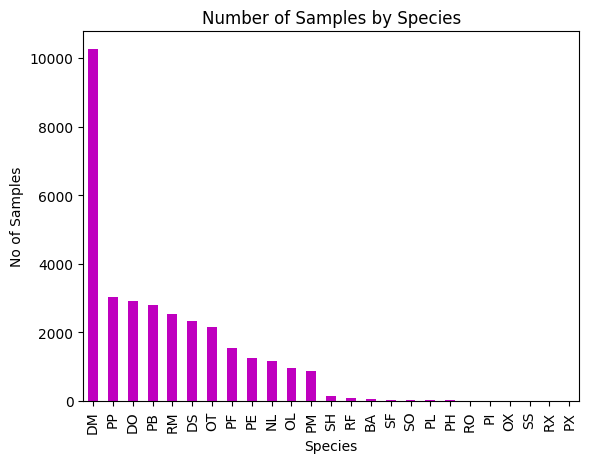

In [ ]:
speciescount = df['species_id'].value_counts()     #count of the species

plt.figure()
speciescount.plot(kind='bar', color='m')
plt.title('Number of Samples by Species')
plt.xlabel('Species')
plt.ylabel('No of Samples')
plt.show()

15. Create a plot of average weight across all species per site.


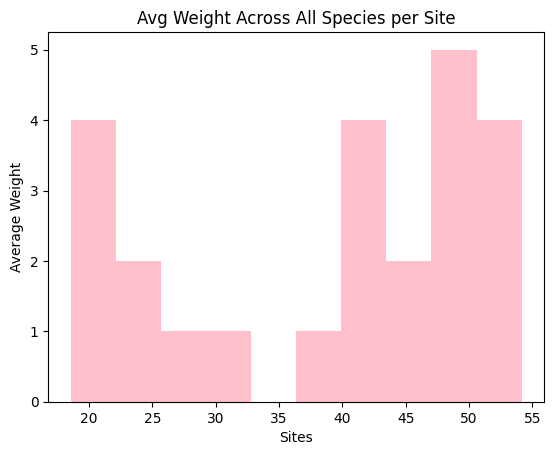

In [ ]:
average_weight_per_site = df.groupby('site_names')['weight'].mean()

plt.figure()
average_weight_per_site.plot(kind='hist', color='pink')  #creating a histogram
plt.title('Avg Weight Across All Species per Site')
plt.xlabel('Sites')
plt.ylabel('Average Weight')
plt.show()

16. Create a plot of total males versus total females for the entire dataset.

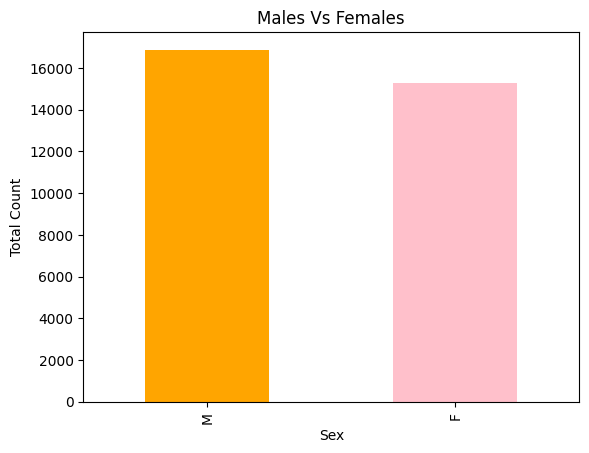

In [ ]:
gender_counts = df['sex'].value_counts()

plt.figure()
gender_counts.plot(kind='bar', color=['orange', 'pink'])
plt.title('Males Vs Females')
plt.xlabel('Sex')
plt.ylabel('Total Count')
plt.show()

17. Create a stacked bar plot, with weight on the Y axis, and the stacked variable being sex. Should show total weight by sex for each site.

<Figure size 640x480 with 0 Axes>

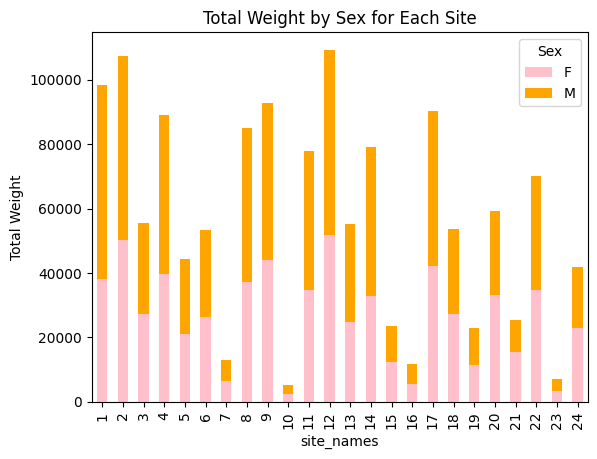

In [ ]:
total_weight = df.groupby(['site_names', 'sex'])['weight'].sum().unstack()
plt.figure()
total_weight.plot(kind='bar', stacked=True, color=['pink', 'orange'])
plt.title('Total Weight by Sex for Each Site')
plt.ylabel('Total Weight')
plt.legend(title='Sex', loc='upper right')